# Apprendre à utiliser et visualiser un Dataset Synthetic

A la fin de ce workshop vous saurez:

- Adopter un workflow de base avec GitHub (Develop, Verify, Commit)
- Générer un dataset synthetic de classification 2D avec la librairie sklearn
- visualiser les classes du dataset sur un graphique 2D
- Visualiser les prédictions de notre réseau de neurones sur un graphique 2D
- (bonus) Introduction au refavtoring : vous refactoriserez un code jupyter pour en faire une fonction réutilisable

In [2]:
#importer les librairies utiles

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification


In [3]:
# creer un dataset separable par une ligne droite en 2D

train_size = 100
test_size = 50
total_size = train_size + test_size

print("Total size:", total_size)

X,y = make_classification(n_samples = total_size,
                           n_features= 2, n_redundant=0, n_informative = 2,
                           random_state=1, n_clusters_per_class =1)

Total size: 150


In [6]:
X.shape, y.shape


((150, 2), (150, 1))

In [7]:
y = y.reshape(-1,1)
y.shape

(150, 1)

In [8]:
X[:10], y[:10]

(array([[ 0.05065666, -1.04565042],
        [ 1.89212817,  0.14141529],
        [ 2.07731874, -1.10588188],
        [-0.21268004,  1.55015655],
        [ 1.33003867, -0.93929107],
        [ 0.9684331 , -1.14497058],
        [-0.12252602, -0.92897868],
        [-2.11442959, -0.72665594],
        [ 1.30958609, -1.03968501],
        [ 1.22239591, -1.00761238]]), array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]]))

In [9]:
#séparer en train/test

X_train, y_train = X[:train_size],y[:train_size]
X_test, y_test = X[-test_size:], y[-test_size:]

assert X_test.shape[0] + X_train.shape[0] == total_size
assert y_test.shape[0] + y_train.shape[0] == total_size

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 2) (100, 1)
(50, 2) (50, 1)


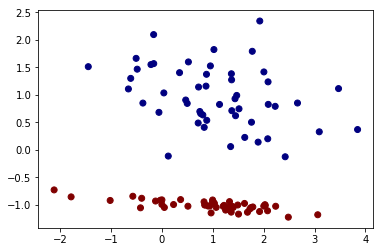

In [10]:
#objectif visualiser le dataset de manière informative

plt.scatter(X_train[:, 0], X_train[:, 1],
           c = y_train[:,0],
            cmap = plt.cm.jet)


In [11]:
# créer une fonction pour creer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    
     # 1ere dimension -> celle des exemples
    total_size = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:train_size], y[:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[-test_size:], y[-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[0] + X_train.shape[0] == total_size
    assert y_test.shape[0] + y_train.shape[0] == total_size
    
    return X_train, y_train, X_test, y_test 



X, y = make_classification(n_samples=200,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)
for each in (X, y):
    print(each.shape)

print()

X_train, y_train, X_test, y_test = split_dataset(X, y)

for each in (X_train, y_train, X_test, y_test):
    print(each.shape)

(200, 2)
(200,)

(132, 2)
(132, 1)
(68, 2)
(68, 1)


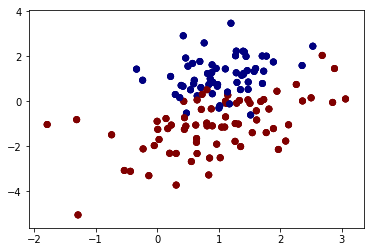

In [19]:
def plot_dataset(X,y):
    """
        Permet d'afficher les classes `y` exemples à 2 features `X`
        Warning la dimension des exemples doit être la première
        
        Soit m, le nombre d'exemples.
        :X, matrices d'exemples(m,2)
        :y, array de label shape(m,1)
    """
    plt.scatter(X_train[:, 0], X_train[:, 1],
           c = y_train[:,0],
            cmap = plt.cm.jet)
    return None

plot_dataset(X_train,y_train)